In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('Advertising.csv',index_col='Unnamed: 0')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 4)

In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().mean()

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [11]:
df.TV.iloc[2] = np.nan

In [12]:
df.isnull().sum()

TV           1
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
df[df['TV'].isnull()]

,TV,Radio,Newspaper,Sales
3,NaN,45.9,69.3,9.3


In [14]:
df.iloc[np.where(df['TV'].isnull())]

,TV,Radio,Newspaper,Sales
3,NaN,45.9,69.3,9.3


In [15]:
# df['TV'] = df['TV'].fillna(df['TV'].mean())
df['TV'].fillna(df['TV'].mean(), inplace=True)

In [16]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

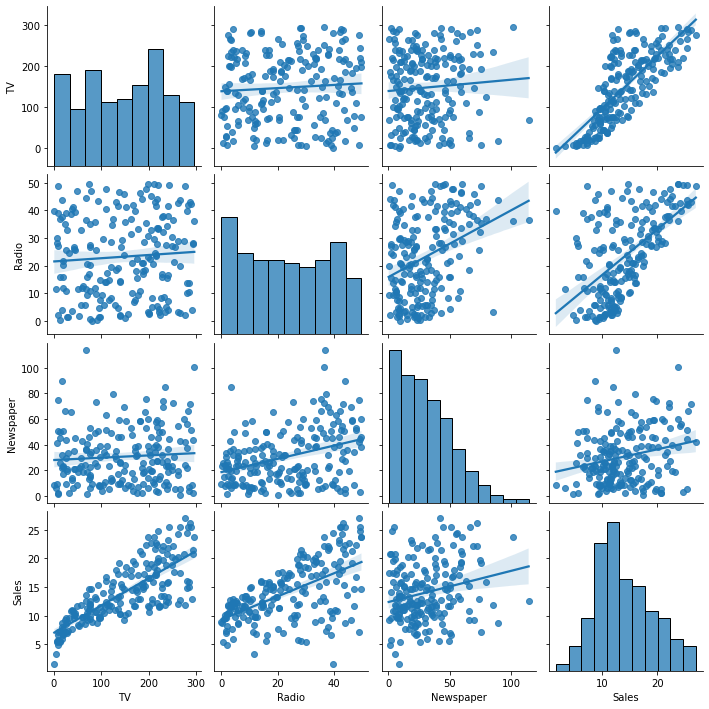

In [17]:
sns.pairplot(df, kind='reg')

<AxesSubplot:ylabel='Density'>

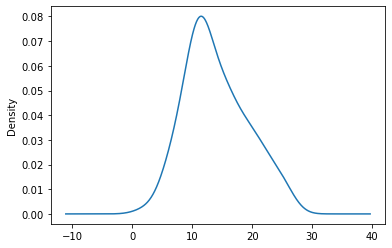

In [18]:
df['Sales'].plot(kind='kde')

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

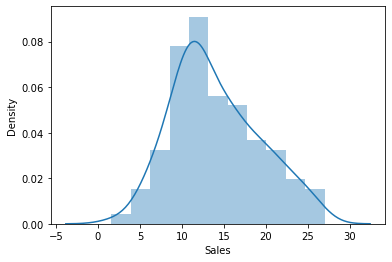

In [19]:
sns.distplot(df['Sales'])

In [20]:
df['Sales'].skew()

0.4075714250767127

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

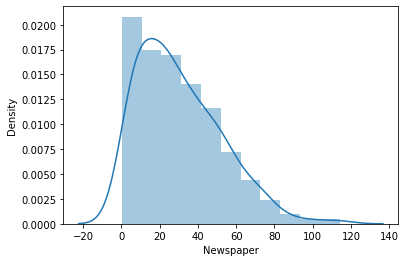

In [21]:
sns.distplot(df['Newspaper'])

In [22]:
df['Newspaper'].skew()

0.8947204074986175

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.06238771883281062

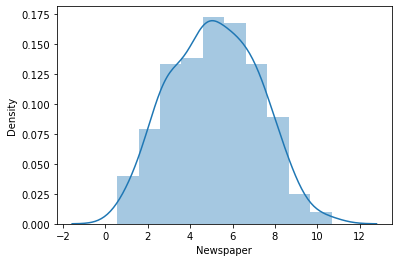

In [23]:
sns.distplot(np.sqrt(df['Newspaper']))
np.sqrt(df['Newspaper']).skew()

- Outlier
- Missing Value ko handle krna hota hai
- Standardization
- Nomalization

In [24]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.100000,37.8,69.2,22.1
2,44.500000,39.3,45.1,10.4
3,147.694975,45.9,69.3,9.3
4,151.500000,41.3,58.5,18.5
5,180.800000,10.8,58.4,12.9


In [25]:
X = df.drop(columns=['Sales'])
y = df['Sales']

In [26]:
X.head()

,TV,Radio,Newspaper
1,230.100000,37.8,69.2
2,44.500000,39.3,45.1
3,147.694975,45.9,69.3
4,151.500000,41.3,58.5
5,180.800000,10.8,58.4


In [27]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_scaled = scaler.fit_transform(X)

In [118]:
X_scaled

array([[ 9.67839579e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.21201566e+00,  1.08280781e+00,  6.69578760e-01],
       [ 0.00000000e+00,  1.52846331e+00,  1.78354865e+00],
       [ 4.46896765e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.88815531e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.63248343e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.05933183e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.22925997e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.63365792e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.11968815e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.58325612e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.86967969e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.45513529e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.89535447e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.62471926e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.60291212e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.38359265e-01,  9.00494200e-01

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression()

In [35]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=52)

In [104]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160,) (40,)


In [105]:
lin_reg = LinearRegression()

In [106]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [107]:
lin_reg.score(X_test, y_test)

0.8327436574324338

In [108]:
y_train.skew()

0.5719972522214658

In [109]:
y_test.skew()

0.1622122816444339

In [110]:
from sklearn.linear_model import Lasso, LassoCV

In [111]:
lassocv = LassoCV(cv = 5, max_iter=200000, normalize=True)

In [112]:
lassocv.fit(X_train, y_train)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=5, max_iter=200000, normalize=True)

In [113]:
lassocv.alpha_

0.000295997229893224

In [114]:
lasso = Lasso(alpha=lassocv.alpha_)

In [115]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.000295997229893224)

In [116]:
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.8327567556332445, 0.901828012284353)